

#**6 january and 12th january**





In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Topmentor/iphone_purchase_records.csv")
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [ ]:
data.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
Salary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchase Iphone,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [ ]:
data.shape

(400, 4)

In [ ]:
data.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [ ]:
data.isnull().sum()   #### no missing values

,0
Gender,0
Age,0
Salary,0
Purchase Iphone,0


In [ ]:
data.isnull().sum()[data.isnull().sum()>0]

,0


In [ ]:
data.Age.fillna(data.Age.mean(), inplace=True)
data.Salary.fillna(data.Salary.mode()[0], inplace=True)

In [ ]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

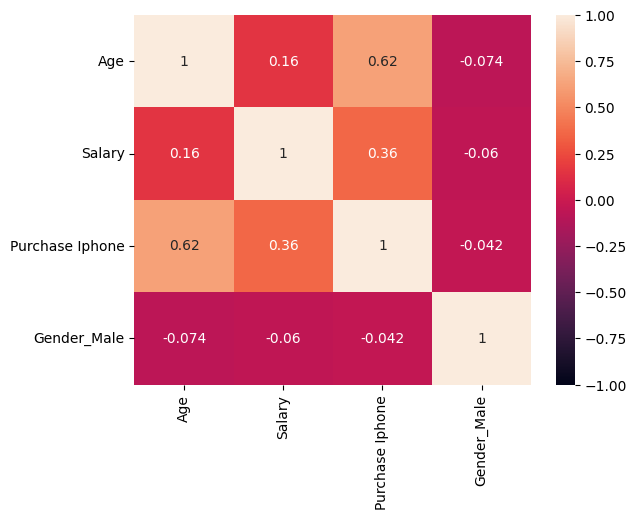

In [ ]:
sns.heatmap(data.corr(),vmin=-1,annot=True)
plt.show()

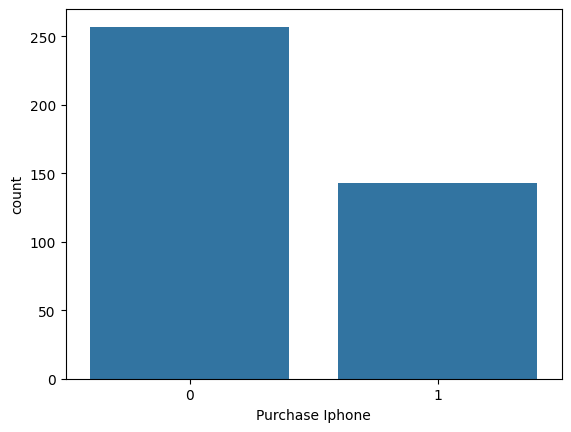

In [ ]:
sns.countplot(x = data["Purchase Iphone"], data = data)
plt.show()

In [ ]:
data['Purchase Iphone'].value_counts()

,count
Purchase Iphone,
0,257
1,143


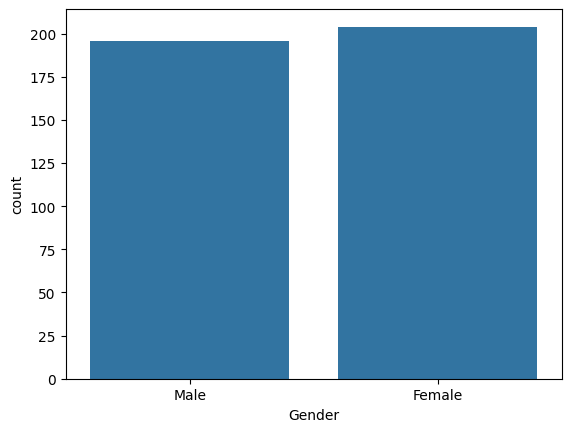

In [ ]:
sns.countplot(x = data["Gender"], data = data)
plt.show()

In [ ]:
data['Gender'].value_counts()

,count
Gender,
Female,204
Male,196


<Figure size 1000x600 with 0 Axes>

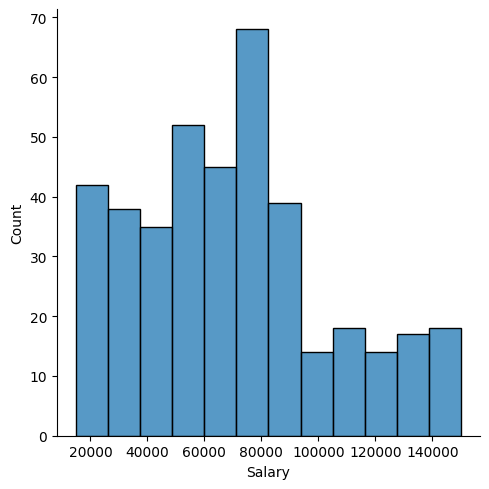

In [ ]:
plt.figure(figsize=(10,6))
sns.displot(x = data["Salary"], data = data)
plt.show()

In [ ]:
data['Salary'].value_counts()

,count
Salary,
72000,12
80000,11
79000,10
75000,9
71000,9
...,...
123000,1
37000,1
115000,1


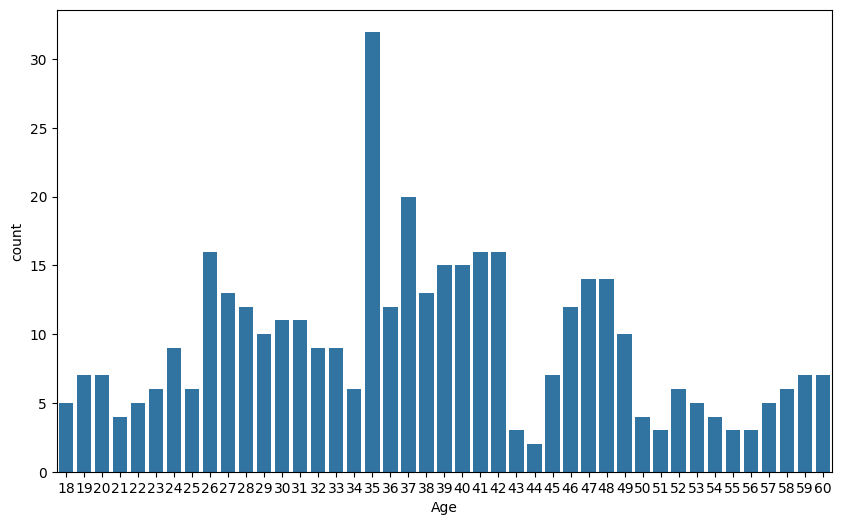

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = data["Age"], data = data)
plt.show()

In [ ]:
data['Age'].value_counts()

,count
Age,
35,32
37,20
26,16
41,16
42,16
39,15
40,15
48,14
47,14


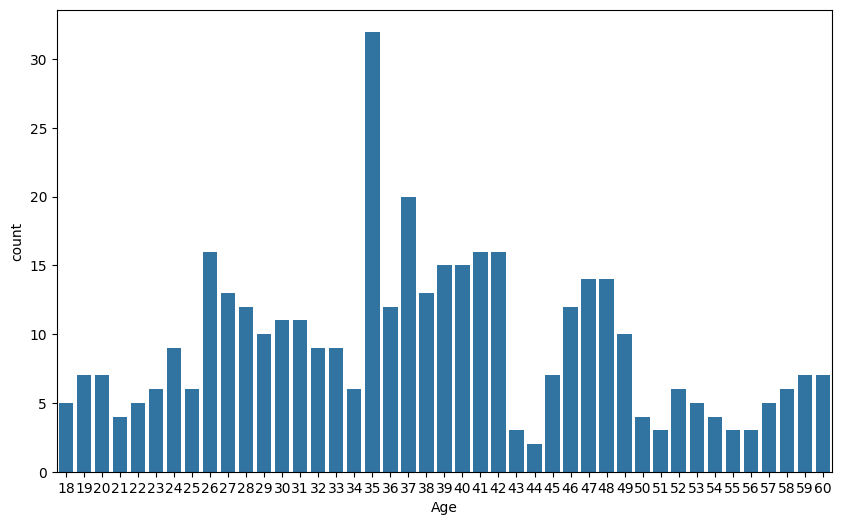

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = data["Age"], data = data)
plt.show()

In [ ]:
X = data[['Age',	'Salary','Gender']]
X.head(2)

,Age,Salary,Gender
0,19,19000,Male
1,35,20000,Male


In [ ]:
y = data[['Purchase Iphone']]
y.head(2)

,Purchase Iphone
0,0
1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [ ]:
X,y = make_classification(n_samples=5000,n_features=10,n_classes=2, random_state=42)
print(X.shape)
print(y.shape)
print(X)

(5000, 10)
(5000,)
[[ 1.86419953 -2.3711592  -0.67130759 ... -0.67354431 -0.69646109
  -0.07686541]
 [ 0.33548674  0.27130442 -2.02015145 ...  0.31740948  0.38546963
   0.13372972]
 [ 0.14663259 -1.54427911  0.59252101 ... -0.20558104 -1.03009508
  -0.65817527]
 ...
 [-1.06725502  1.3232629   0.40885419 ... -0.03644982 -1.3116659
  -2.0157712 ]
 [ 1.21249094 -1.28557149 -0.81813422 ... -1.84190565  0.39546944
  -1.16454678]
 [ 0.02000132 -1.05592707  1.88566879 ... -1.8550231   0.17599725
  -0.36139164]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [ ]:
X_train.shape

(4000, 10)

In [ ]:
decisiontree_model = DecisionTreeClassifier(random_state=1234)
decisiontree_model.fit(X_train, y_train)
print("Training the models")

Training the models


In [ ]:
y_pred_ds = decisiontree_model.predict_proba(X_test)[:,1]

In [ ]:
test_data = pd.DataFrame({'Actual': y_test, 'Decision_Tree': y_pred_ds })
test_data

,Actual,Decision_Tree
0,1,1.0
1,0,0.0
2,0,0.0
3,0,0.0
4,1,1.0
...,...,...
995,0,0.0
996,1,0.0
997,1,1.0
998,1,1.0


In [ ]:
confusion_matrix(y_test, y_pred_ds)

array([[428,  70],
       [ 72, 430]])

In [ ]:
accuracy_score(y_test, y_pred_ds)

0.858

In [ ]:
for model in ['Decision_Tree']:
  fpr,tpr,thresh = roc_curve(test_data['Actual'],test_data[model])
  roc_auc = auc(fpr, tpr)
  print(model)
  print(roc_auc)

NameError: name 'test_data' is not defined

In [ ]:
for model in ['Decision_Tree']:
    fpr,tpr,thresh = roc_curve(test_data['Actual'],test_data[model])
    plt.plot(fpr,tpr, label = f'{model}')
    plt.plot([0,1],[0,1],'r--',label = 'Random')
    plt.legend()
    plt.show()


NameError: name 'test_data' is not defined